In [ ]:
!pip install paho-mqtt

In [ ]:
import paho.mqtt.client as mqtt
import json
import pandas as pd

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("quanam")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload)[1:])
    a_json = json.loads(str(msg.payload)[2:-1])
    #dataframe = pd.DataFrame.from_dict(a_json, orient="index")
    if not client.total:
      client.total = [a_json]
      print(a_json['ID'])
      print(client.total[0]['ID'])
    elif a_json['ID'] == client.total[0]['ID']:
      df = pd.DataFrame.from_records(client.total)
      df.to_csv('out.csv', index=False)  
      client.disconnect()
    else:
      client.total.append(a_json)
    print(len(client.total))


client = mqtt.Client()
client.total = []
client.username_pw_set('maratoners', 'btc-2021')
client.on_connect = on_connect
client.on_message = on_message

client.connect("iot.maratona.dev", 31666, 60)

# HOST: iot.maratona.dev
# PORT: 31666
# USERNAME: maratoners
# PASSWORD: btc-2021
# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

Streaming output truncated to the last 5000 lines.
quanam '{"ILLUM": "390.19", "HUMID": "63.83", "CO2": "422.76", "SOUND": "24.18", "TEMP": "17.41", "RYTHM": "63.55", "ID": 4}'
702
quanam '{"ILLUM": "454.11", "HUMID": "70.64", "CO2": "619.85", "SOUND": "16.5", "TEMP": "20.31", "RYTHM": "83.19", "ID": 5}'
703
quanam '{"ILLUM": "479.5", "HUMID": "66.94", "CO2": "498.02", "SOUND": "17.82", "TEMP": "22.35", "RYTHM": "97.33", "ID": 6}'
704
quanam '{"ILLUM": "516.29", "HUMID": "52.92", "CO2": "468.85", "SOUND": "29.8", "TEMP": "19.59", "RYTHM": "66.72", "ID": 7}'
705
quanam '{"ILLUM": "470.31", "HUMID": "59.73", "CO2": "421.78", "SOUND": "33.12", "TEMP": "20.82", "RYTHM": "74.52", "ID": 8}'
706
quanam '{"ILLUM": "505.87", "HUMID": "64.34", "CO2": "438.02", "SOUND": "33.27", "TEMP": "21.2", "RYTHM": "82.52", "ID": 9}'
707
quanam '{"ILLUM": "435.48", "HUMID": "69.03", "CO2": "472.48", "SOUND": "33.16", "TEMP": "18.46", "RYTHM": "77.29", "ID": 10}'
708
quanam '{"ILLUM": "424.18", "HUMID": "80.0

7

In [304]:
import json
def main(data=None):
    dic = {'co2':{'activity-room':[None,500],
                'refectory':[None,400],
                'room-1':[None,300],
                'bathroom-main':[None,500],
                'garden':[None,500]},
         'temperature':{'activity-room':[19,22],
                        'refectory':[20,23],
                        'room-1':[21,23],
                        'bathroom-main':[22,25],
                        'garden':[15,22]},
         'humidity':{'activity-room':[50,60],
                     'refectory':[50,70],
                     'room-1':[50,70],
                     'bathroom-main':[60,75],
                     'garden':[50,80]},
         'sound':{'activity-room':[0,40],
                  'refectory':[20,35],
                  'room-1':[10,30],
                  'bathroom-main':[20,35],
                  'garden':[10,35]},
         'illumination':{'activity-room':[300,750],
                         'refectory':[200,500],
                         'room-1':[100,200],
                         'bathroom-main':[100,200],
                         'garden':[None,None]}
    }
    result = []
    if not "room" in data.keys():
        return {"alerts":[]}
    r = data["room"]
    
    for i,a in data['values'].items():
        low = dic[i][r][0]
        high = dic[i][r][1]
        if (low and not (a >= low)) or (high and not a <= high):
            result.append(i)
    return {"alerts":result}

In [305]:
u = {
  "room": "garden",
  "values": {
    "co2": 400,
    "temperature": 14,
    "humidity": 49,
    "sound": 36,
    "illumination": 20100
  }
}
print(main(u))

{'alerts': ['temperature', 'humidity', 'sound']}


In [302]:
import requests
url = "https://us-south.functions.appdomain.cloud/api/v1/web/ngcesarng%40hotmail.com_dev/default/desafio-2-2021.json"
data = {
  "room": "garden",
  "values": {
    "co2": 400,
    "temperature": 14,
    "humidity": 49,
    "sound": 36,
    "illumination": 20100
  }
}
r = requests.post(url,json=data)
print(r)

<Response [200]>


In [303]:
r.text

'{\n  "alerts": ["humidity", "sound", "temperature"]\n}'

In [ ]:
from matplotlib import pyplot as plt
def eee(true,pred):
  plt.figure(figsize=(20, 4))
  plt.scatter(range(len(true)), sorted(list(true)),color='g', label="original")
  plt.plot(range(len(true)), sorted(list(pred)),color='k',label="predecido")
  plt.title("Digital House")
  plt.legend()
  plt.show()
  inicio = 0
  cant = 50
  y = true[inicio:inicio + cant]
  y_p = pred[inicio:inicio + cant]
  x_ax = range(len(y))
  plt.figure(figsize=(20, 4))
  plt.plot(x_ax, y, label="original",marker='o')
  plt.plot(x_ax, y_p, label="predecido",marker='o')
  plt.title("Digital House")
  plt.legend()
  plt.show()

In [452]:
import pandas as pd
df = pd.read_csv('out.csv')  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ILLUM   3200 non-null   float64
 1   HUMID   3200 non-null   float64
 2   CO2     3200 non-null   float64
 3   SOUND   3200 non-null   float64
 4   TEMP    3200 non-null   float64
 5   RYTHM   3200 non-null   float64
 6   ID      3200 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 175.1 KB


In [453]:
features = ["ILLUM","SOUND","HUMID","CO2","TEMP"]
target = 'RYTHM'

X = df[features]
y = df[target]

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=None)

In [515]:
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()

X_train = nor.fit_transform(X_train)
X_test = nor.transform(X_test)

In [516]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [517]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test=poly.transform(X_test)

0.21037101979693518
0.1768124795768612
0.1768124795768612


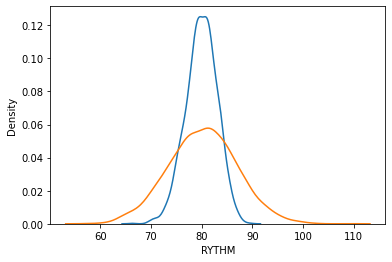

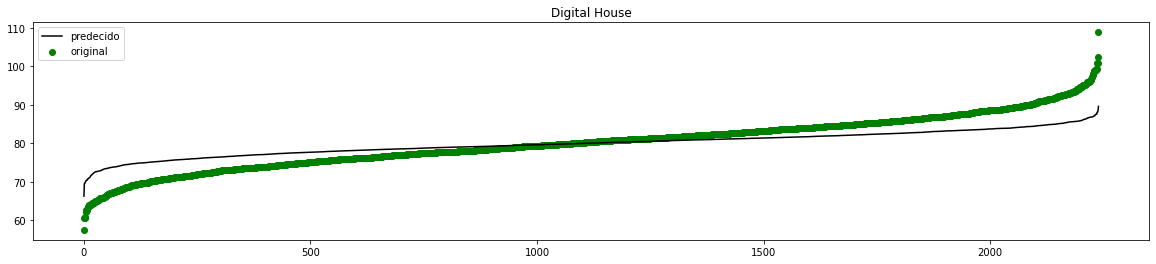

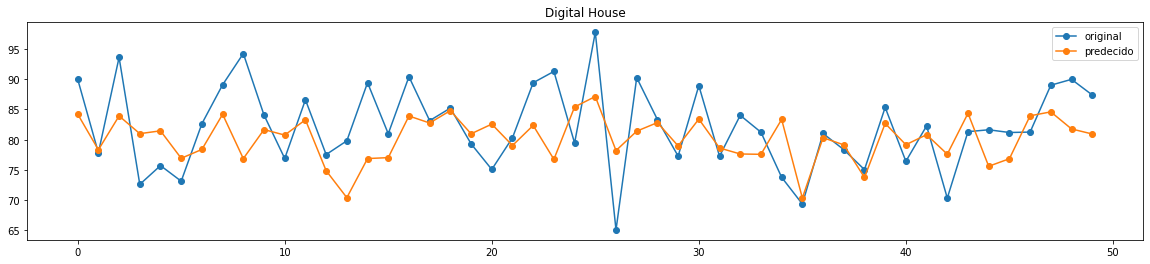

In [518]:
from sklearn.linear_model import LinearRegression

import seaborn as sns
from sklearn.metrics import r2_score
# Defines model that the data is trained on
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(r2_score(y_test,y_pred))
sns.kdeplot(y_pred, label = "Predecido")
sns.kdeplot(y_test, label = "Original")
eee(y_test,y_pred)


In [440]:
!wget https://raw.githubusercontent.com/maratonadev/desafio-2-2021/main/assets/answers.csv
answers = pd.read_csv('answers.csv')  
answers.info()

--2021-11-29 00:52:01--  https://raw.githubusercontent.com/maratonadev/desafio-2-2021/main/assets/answers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31556 (31K) [text/plain]
Saving to: ‘answers.csv.1’

answers.csv.1       100%[===================>]  30.82K  --.-KB/s    in 0.003s  

2021-11-29 00:52:02 (9.69 MB/s) - ‘answers.csv.1’ saved [31556/31556]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      800 non-null    int64  
 1   ILLUM   800 non-null    float64
 2   HUMID   800 non-null    float64
 3   CO2     800 non-null    float64
 4   SOUND   800 non-null    float64
 5   TEMP    800 non-null    float64
 6   

In [451]:
an = answers.copy()
X = an[features]
X = scaler.transform(X)
X = poly.transform(X)
answers[target] = model.predict(X)
print(answers.info())
answers.to_csv('ANSWERS2.csv', index=False)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      800 non-null    int64  
 1   ILLUM   800 non-null    float64
 2   HUMID   800 non-null    float64
 3   CO2     800 non-null    float64
 4   SOUND   800 non-null    float64
 5   TEMP    800 non-null    float64
 6   RYTHM   800 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 43.9 KB
None


In [442]:
answers

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,76.825949
1,1,342.96,63.19,488.85,37.36,20.41,80.783493
2,2,369.86,57.39,516.86,26.45,20.89,80.487773
3,3,304.65,67.80,517.50,32.98,22.52,83.177904
4,4,442.25,68.21,500.91,37.28,21.88,83.990202
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,75.716478
796,796,572.90,59.42,502.12,36.12,19.70,81.268376
797,797,460.78,64.28,560.54,31.20,15.11,77.151050
798,798,499.75,67.20,536.88,30.68,17.57,79.463998
